
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for ...
from matplotlib import pyplot as plt # used for ...
import pylab # used for ...
import pingouin as pg # used for ...

df_mh = pd.read_csv('MillerHadenData.csv')



In [2]:
# Q1a (code):

# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print("Abil, IQ, Home and TV are ratio data.")


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
Abil, IQ, Home and TV are ratio data.


In [3]:
# Q1b (code):
# Check for missing values
count_missing = df_mh[["Abil","IQ"]].isnull().any().sum()

# Check whether there is a data point for each participant on both variables
if count_missing == 0:
    print("There is no missing data." )
else:
    print("There are {count_missing} data points missing.")



There is no missing data.


In [4]:
# Q1c (code):
# Check data distribution
import scipy.stats as stats
score_shapiro_Abil, p_val_shapiro_Abil = stats.shapiro(df_mh['Abil'])
score_shapiro_IQ, p_val_shapiro_IQ = stats.shapiro(df_mh['IQ'])
print(f"Score_Abil={score_shapiro_Abil}\np_value_Abil={p_val_shapiro_Abil}\nScore_IQ={score_shapiro_IQ}\np_value_IQ={p_val_shapiro_IQ}")

# print anwsers
if p_val_shapiro_Abil > 0.05:
    print ("Data of Reading Ability are normally distributed")
else:
    print ("Data of Reading Ability are not normally distributed")

if p_val_shapiro_IQ > 0.05:
    print ("Data of Reading Ability are normally distributed")
else:
    print ("Data of Reading Ability are not normally distributed")

Score_Abil=0.9487950205802917
p_value_Abil=0.2354886382818222
Score_IQ=0.9636043310165405
p_value_IQ=0.4908201992511749
Data of Reading Ability are normally distributed
Data of Reading Ability are normally distributed


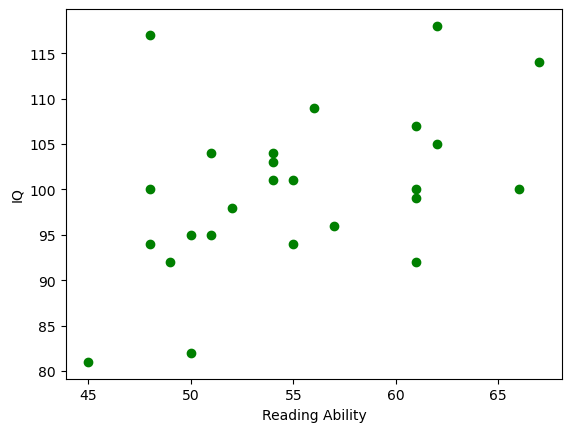

In [5]:
# Q1d (code):
# Scatter plot

Abil = df_mh["Abil"]
IQ = df_mh["IQ"]

plt.scatter(Abil, IQ, c="g")
plt.xlabel("Reading Ability") 
plt.ylabel("IQ")
plt.show()



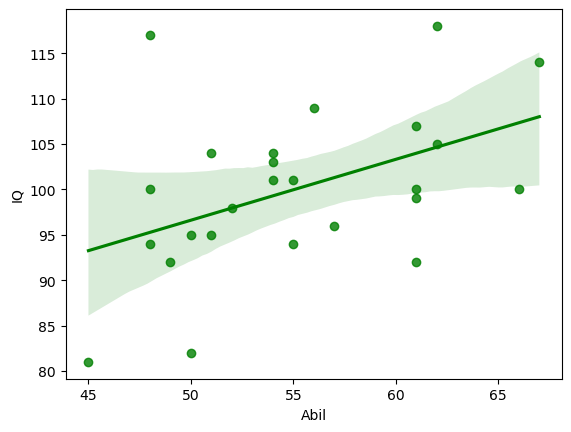

In [6]:
# Q1e (code):
# Correlation line
plot_corr_sns = sns.regplot(x="Abil", y="IQ", color="g", data=df_mh)

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [7]:
# Q2a (answer with words):
# we can use Pearson coefficient test, because both of the variables are normally distributed

In [8]:
# Q2b (code):
correlation= pg.corr(Abil, IQ)
correlation

,n,r,CI95%,p-val,BF10,power
pearson,25,0.45117,"[0.07, 0.72]",0.023593,2.804,0.640299


In [9]:
# Q2c (answer with words):



#r=0.45119.The correlation coefficient is 0.45117,
#The directionality is positive. When the value of one variable increases,the value of another one will also increase.
#The correlation between reading ability and IQ is not weak or strong, but in a medium degree. 




## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [10]:
# Q3a (answer in words):
# H0:There is no association between the time spent reading at home and the reading ability.
# H1:Perple with different reading ability has different amount of time spent on reading at home per week.

In [11]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for ....
from scipy.stats import chi2_contingency ##used for ....
import numpy as np

# Define the rounded average for Reading Ability and Home
avg_Abil = round(df_mh['Abil'].mean())
avg_Home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] <= avg_Abil, 'Low', 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = np.where(df_mh['Home'] <= avg_Home, 'Infrequent', 'Frequent')# Display  DataFrame

# Display the new DataFrame
df_mh.head()


,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [12]:
# Q3c (code):

# Construct Contingency Matrix
high_frequent = df_mh[(df_mh['Rank_Abil'] == "High") & (df_mh['Rank_Home'] == 'Frequent')]
high_infrequent = df_mh[(df_mh['Rank_Abil'] == "High") & (df_mh['Rank_Home'] == 'Infrequent')]
low_frequent = df_mh[(df_mh['Rank_Abil'] == "Low") & (df_mh['Rank_Home'] == 'Frequent')]
low_infrequent = df_mh[(df_mh['Rank_Abil'] == "Low") & (df_mh['Rank_Home'] == 'Infrequent')]

data4contingency = []
data4contingency.append(len((high_frequent)))
data4contingency.append(len(high_infrequent))
data4contingency.append(len(low_frequent))
data4contingency.append(len(low_infrequent))

print('The values:')
print(data4contingency)

# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data_cm)

The values:
[8, 2, 3, 12]
The contingency matrix
[[ 8  2]
 [ 3 12]]


In [13]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies= chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


In [14]:
# Q3e (answer in words):
# p value < 0.05
# null hypothesis is rejected
# There exists corelation between the amount of time spent reading at home per week and different reading abilities in statistics. 


## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [15]:

import pandas as pd # used for ...
from scipy import stats #
import numpy as np #
import matplotlib.pyplot as plt ##
import seaborn as sns #

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [16]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean = df_evaluators['age'].mean()
std = df_evaluators['age'].std()
print("mean for age:", mean)
print("deviation for age:", std)

mean for age: 30.852941176470587
deviation for age: 6.238358141327351


In [17]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators.groupby('sex').size()

for sex, count in sex_counts.items():
    sex_str = "Male" if sex == 1 else "Female"
    print(f"{sex_str} evaluators count: {count}")



Male evaluators count: 4
Female evaluators count: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [18]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [19]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
int_df = df_ratings[(df_ratings['Category'] == 'thoughtful') | (df_ratings['Category'] == 'competent')|(df_ratings['Category'] == 'intelligent')]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean= int_df.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'


# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[(df_ratings['Category'] == 'impression') | (df_ratings['Category'] == 'hire')]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2_with_condition = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')


# Select only the necessary columns as per the structure required
final_ratings = ratings2_with_condition[['eval_id', 'Category', 'Rating', 'condition']]


# Arrange by 'eval_id' and 'Category'
ratings2 = final_ratings.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [20]:
# Q6a (answer in words):
# Null hypothesis:
#There is no significant difference in the rating given by evaluators who listened to pitches and evaluators who read the pitches. 
# Alternative hypothesis:
#There is a significant difference(higher or lower) in the  rating given by evaluators who listened to pitches compared to evaluators who read the pitches. 
# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [21]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#two-tail，because the alternative hypothesis is non-directional

In [22]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
#the independent variable:condition
#the dependent variable:rating


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [23]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings
intellect_ratings_listen = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'listened')]['Rating']
intellect_ratings_read = ratings2[(ratings2['Category'] == 'intellect') & (ratings2['condition'] == 'read')]['Rating']
# Descriptive statistics for intellect ratings
intellect_desc_listen = intellect_ratings_listen.describe()
intellect_desc_read = intellect_ratings_read.describe()

# Test for normal distribution (Shapiro-Wilk test)
score_in1, p_value_in1 = stats.shapiro(intellect_ratings_listen)
if p_value_in1 > 0.05:
    in_shapiro_result_listen = "intellect ratings of listened are normally distributed"
else:
    in_shapiro_result_listen = "intellect ratings of listened are not normally distributed"

score_in2, p_value_in2 = stats.shapiro(intellect_ratings_read)
if p_value_in2 > 0.05:
    in_shapiro_result_read = "intellect ratings of read are normally distributed"
else:
    in_shapiro_result_read = "intellect ratings of read are not normally distributed"
    

# Test for homogeneity of variances (Levene's test)
stat_in3, p_val_in3 = stats.levene(intellect_ratings_listen,intellect_ratings_read)

if p_val_in3  < 0.05:
    in_levene_result= "Levene's test is significant -Don't use t test"
else:
    in_levene_result= "Levene's test is not significant - proceed"

    
intellect_desc_listen,intellect_desc_read,in_shapiro_result_listen,in_shapiro_result_read,in_levene_result 

(count    21.000000
 mean      5.634921
 std       1.608674
 min       2.333333
 25%       5.000000
 50%       5.666667
 75%       6.000000
 max       9.000000
 Name: Rating, dtype: float64,
 count    18.000000
 mean      3.648148
 std       1.911343
 min       0.666667
 25%       2.083333
 50%       3.666667
 75%       4.666667
 max       7.000000
 Name: Rating, dtype: float64,
 'intellect ratings of listened are normally distributed',
 'intellect ratings of read are normally distributed',
 "Levene's test is not significant - proceed")

In [24]:
# Independent t-tests
score_in4, p_val_in4 = stats.ttest_ind(intellect_ratings_listen,intellect_ratings_read)
if p_val_in4 < 0.05:
    ttest_result_in = "Difference is statistically significant - reject H0, confirm H1"
else:
    ttest_result_in = "Difference is NOT statistically significant - reject H1, confirm H0"

ttest_result_in

'Difference is statistically significant - reject H0, confirm H1'

In [25]:
# Descriptive analysis of the ratings
impression_ratings_listen = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'listened')]['Rating']
impression_ratings_read = ratings2[(ratings2['Category'] == 'impression') & (ratings2['condition'] == 'read')]['Rating']
# Descriptive statistics for intellect ratings
impression_desc_listen = impression_ratings_listen.describe()
impression_desc_read = impression_ratings_read.describe()

# Test for normal distribution (Shapiro-Wilk test)
score_im1, p_value_im1 = stats.shapiro(impression_ratings_listen)
if p_value_im1 > 0.05:
    im_shapiro_result_listen = "impression ratings of listened are normally distributed"
else:
    im_shapiro_result_listen = "impression ratings of listened are not normally distributed"

score_im2, p_value_im2 = stats.shapiro(impression_ratings_read)
if p_value_in2 > 0.05:
    im_shapiro_result_read = "impression ratings of read are normally distributed"
else:
    im_shapiro_result_read = "impression ratings of read are not normally distributed"
    

# Test for homogeneity of variances (Levene's test)
stat_im3, p_val_im3 = stats.levene(impression_ratings_listen,impression_ratings_read)

if p_val_im3  < 0.05:
    im_levene_result= "Levene's test is significant -Don't use t test"
else:
    im_levene_result= "Levene's test is not significant - proceed"

    
impression_desc_listen,impression_desc_read,im_shapiro_result_listen,im_shapiro_result_read,im_levene_result 

(count    21.000000
 mean      5.968254
 std       1.917477
 min       2.333333
 25%       4.666667
 50%       6.666667
 75%       7.333333
 max       8.666667
 Name: Rating, dtype: float64,
 count    18.000000
 mean      4.074074
 std       2.233306
 min       0.333333
 25%       2.166667
 50%       4.500000
 75%       5.333333
 max       7.333333
 Name: Rating, dtype: float64,
 'impression ratings of listened are normally distributed',
 'impression ratings of read are normally distributed',
 "Levene's test is not significant - proceed")

In [26]:
# Independent t-tests
score_im4, p_val_im4 = stats.ttest_ind(impression_ratings_listen,impression_ratings_read)
if p_val_im4 < 0.05:
    ttest_result_im = "Difference is statistically significant - reject H0, confirm H1"
else:
    ttest_result_im = "Difference is NOT statistically significant - reject H1, confirm H0"

ttest_result_in

'Difference is statistically significant - reject H0, confirm H1'

In [27]:
# Descriptive analysis of the ratings
hire_ratings_listen = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'listened')]['Rating']
hire_ratings_read = ratings2[(ratings2['Category'] == 'hire') & (ratings2['condition'] == 'read')]['Rating']
# Descriptive statistics for intellect ratings
hire_desc_listen = hire_ratings_listen.describe()
hire_desc_read = hire_ratings_read.describe()

# Test for normal distribution (Shapiro-Wilk test)
score_hi1, p_value_hi1 = stats.shapiro(hire_ratings_listen)
if p_value_hi1 > 0.05:
    hi_shapiro_result_listen = "hire ratings of listened are normally distributed"
else:
    hi_shapiro_result_listen = "hire ratings of listened are not normally distributed"

score_hi2, p_value_hi2 = stats.shapiro(hire_ratings_read)
if p_value_in2 > 0.05:
    hi_shapiro_result_read = "hire ratings of read are normally distributed"
else:
    hi_shapiro_result_read = "hire ratings of read are not normally distributed"
    

# Test for homogeneity of variances (Levene's test)
stat_ihi3, p_val_hi3 = stats.levene(hire_ratings_listen,hire_ratings_read)

if p_val_hi3  < 0.05:
    hi_levene_result= "Levene's test is significant -Don't use t test"
else:
    hi_levene_result= "Levene's test is not significant - proceed"

    
hire_desc_listen,hire_desc_read,hi_shapiro_result_listen,hi_shapiro_result_read,hi_levene_result 

(count    21.000000
 mean      4.714286
 std       2.261479
 min       0.000000
 25%       4.000000
 50%       5.000000
 75%       7.000000
 max       8.000000
 Name: Rating, dtype: float64,
 count    18.000000
 mean      2.888889
 std       2.054805
 min       0.000000
 25%       1.250000
 50%       2.000000
 75%       4.000000
 max       7.000000
 Name: Rating, dtype: float64,
 'hire ratings of listened are normally distributed',
 'hire ratings of read are normally distributed',
 "Levene's test is not significant - proceed")

In [28]:
# Independent t-tests
score_hi4, p_val_hi4 = stats.ttest_ind(hire_ratings_listen,hire_ratings_read)
if p_val_hi4 < 0.05:
    ttest_result_hi = "Difference is statistically significant - reject H0, confirm H1"
else:
    ttest_result_hi = "Difference is NOT statistically significant - reject H1, confirm H0"

ttest_result_hi

'Difference is statistically significant - reject H0, confirm H1'

In [29]:
#Q7b (answer in words):
# the descriptive analysis provides simple statistic results for central tendency and distribution situation of data

#results of three Shapiro-Wilk tests shows data used in t-test are all normally distributed, this means they are all suitable for t-test

#results of three Levene tests  are all not significant, which means here is no significant difference in ratings between listen and read groups for each test.
# This is to say, the assumption of homogeneity of variances is met; data are suitable for t test.

#results of three t-tests are all "Difference is statistically significant", which means There is a significant difference in the  rating given by evaluators who listened to pitches compared to evaluators who read the pitches for all kinds of ratings.  